In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import statsmodels.stats.api as sms
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_color_codes('dark')

### reading cubic zirconia data

In [3]:
df = pd.read_csv('cubic_zirconia.csv')
df = df.drop('Unnamed: 0', axis=1)

### checking head of the dataset

In [4]:
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.tail(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [6]:
df.shape

(26967, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


#### There are 7 features of real numbers data type and 3 of string data type. 
#### we can see that depth feature has missing values

### Five number summary

In [8]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


#### Outliers are present in carat, y, z and price features.
#### price feature is higly right skewed and all other features were slighlty right skewed.

## EDA

In [9]:
# profile = df.profile_report(title='project_report')
# profile.to_file('report.html')

### checking for Null values.

In [10]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
df['depth'] = df['depth'].fillna(df['depth'].median())

### checking zeroes percentage

In [12]:
count = 0 
for i in df.columns:
    if df[i].dtype != 'object':
        for j in df[i]:
            if j == 0:
                count += 1
        print("Zeroes percentage for {} feature is : {}".format(i, round(count/len(df))))
        count = 0

Zeroes percentage for carat feature is : 0
Zeroes percentage for depth feature is : 0
Zeroes percentage for table feature is : 0
Zeroes percentage for x feature is : 0
Zeroes percentage for y feature is : 0
Zeroes percentage for z feature is : 0
Zeroes percentage for price feature is : 0


In [13]:
null_values = df.isnull().sum().sum()
null_percent = (null_values / len(df))*100
print('Null values is present') if null_values > 0 else print('Null values is not present')
print('Drop all the null values') if null_percent < 3 else print('Impute null values')

Null values is not present
Drop all the null values


In [14]:
# Dropping null values as it is less than 3%.
if null_percent < 3:
    df.dropna(inplace=True)

### checking for Duplicate values

In [15]:
duplicate_values = df.duplicated().sum()
if duplicate_values > 0:
    df.drop_duplicates(inplace=True)

### Uni-variate Analysis

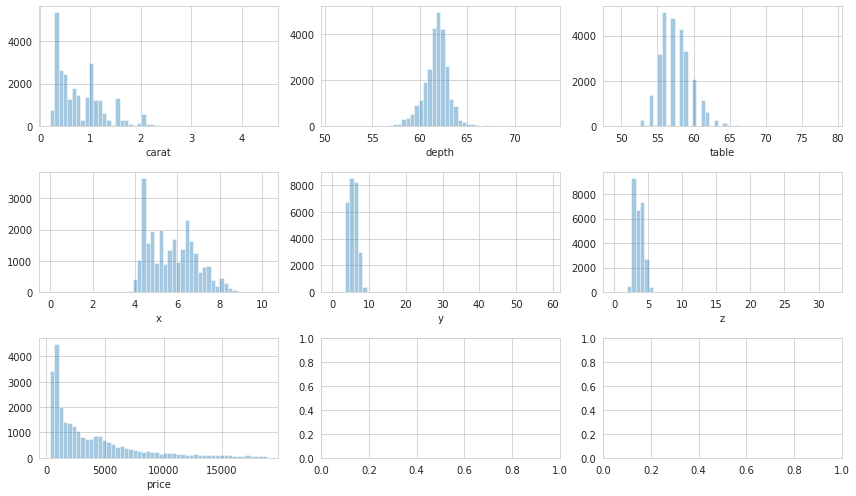

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(12,7))
row, col = 0, 0
for i in df.columns:
    if df[i].dtype != 'object':
        if (row < 3) & (col < 3):
            sns.distplot(df[i], kde=False, ax=axes[row][col])
            col += 1
        else:       
            row += 1
            col = 0
            sns.distplot(df[i], kde=False, ax=axes[row][col])
            col += 1
plt.tight_layout()    

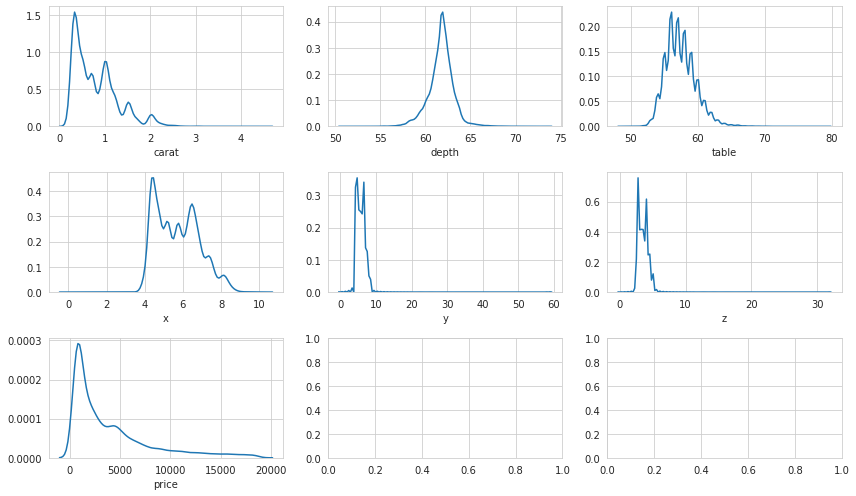

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(12,7))
row, col = 0, 0
for i in df.columns:
    if df[i].dtype != 'object':
        if (row < 3) & (col < 3):
            sns.distplot(df[i], hist=False, ax=axes[row][col])
            col += 1
        else:       
            row += 1
            col = 0
            sns.distplot(df[i], hist=False, ax=axes[row][col])
            col += 1
plt.tight_layout()    

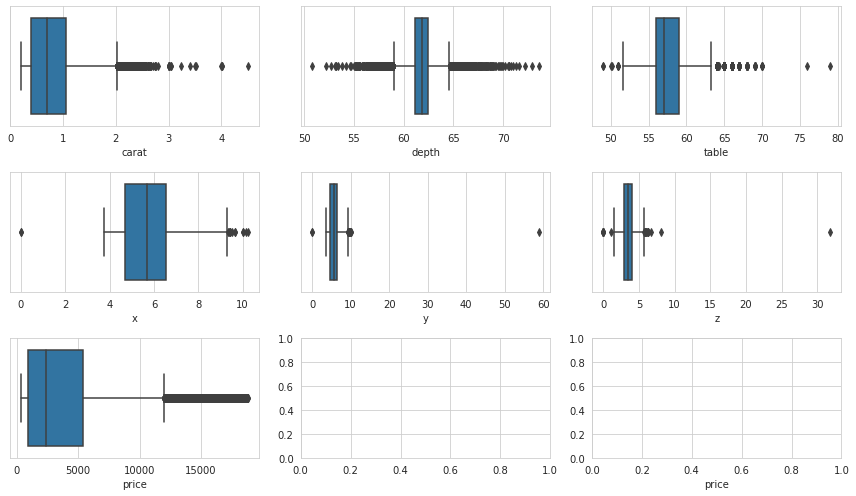

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(12,7))
row, col = 0, 0
for i in df.columns:
    if df[i].dtype != 'object':
        if (row < 3) & (col < 3):
            sns.boxplot(df[i], ax=axes[row][col])
            col += 1
        else:       
            row += 1
            col = 0
            sns.boxplot(df[i], ax=axes[row][col])
            col += 1
        plt.xlabel("{}".format(i));
plt.tight_layout()    

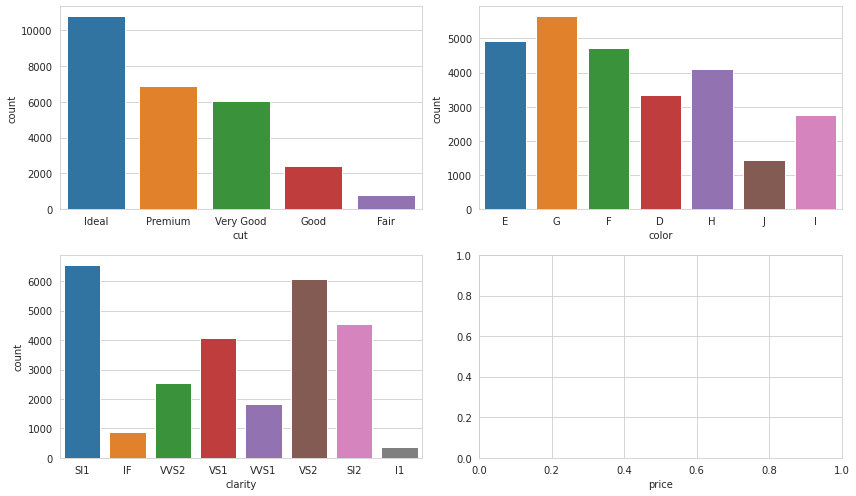

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12,7));
row = col = 0
for i in df.columns:
    if df[i].dtype == 'object':
        if (row < 2) & (col < 2):
            sns.countplot(df[i], ax=axes[row][col]);
            col += 1
        else:
            row += 1
            col = 0
            sns.countplot(df[i], ax=axes[row][col]);
            col += 0
    plt.xlabel("{}".format(i));
plt.tight_layout()

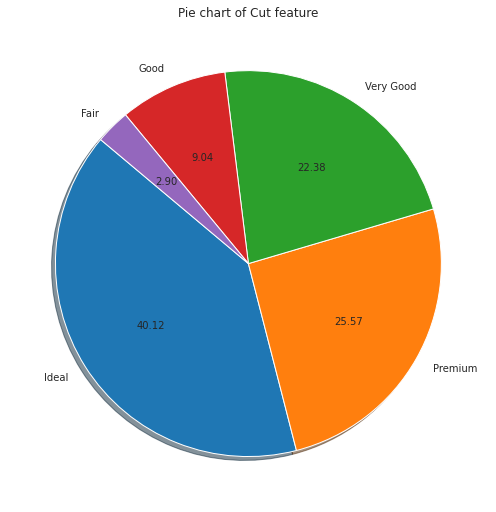

In [20]:
plt.figure(figsize=(12,7));
plt.pie(x=df['cut'].value_counts(), autopct='%0.2f', labels=df.cut.unique(), shadow=True,  startangle=140);
plt.tight_layout();
plt.title("Pie chart of Cut feature");

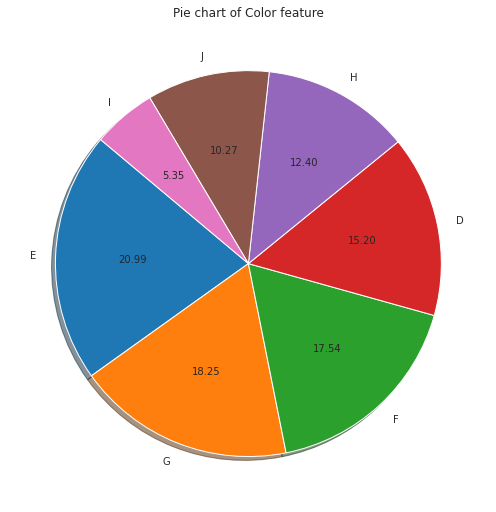

In [21]:
plt.figure(figsize=(12,7));
plt.pie(x=df['color'].value_counts(), autopct='%0.2f', labels=df.color.unique(), shadow=True,  startangle=140);
plt.tight_layout();
plt.title("Pie chart of Color feature");

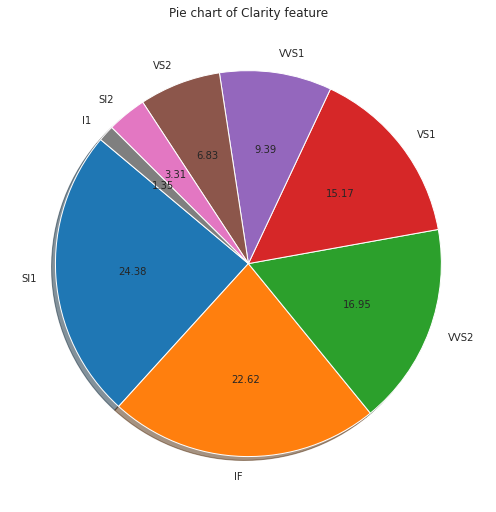

In [22]:
plt.figure(figsize=(12,7));
plt.pie(x=df['clarity'].value_counts(), autopct='%0.2f', labels=df.clarity.unique(), shadow=True,  startangle=140);
plt.tight_layout();
plt.title("Pie chart of Clarity feature");

### Bivariate Analysis

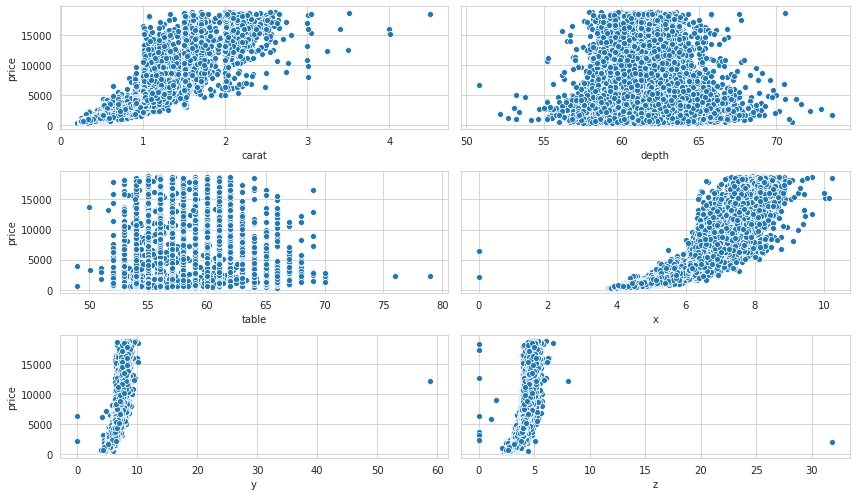

In [23]:
fig, axes = plt.subplots(3,2, figsize=(12,7), sharey=True)
row, col = 0, 0
for i in df.columns[:-1]:
    if df[i].dtype != 'object':
        if (row < 3) & (col < 2):
            sns.scatterplot(df[i], df['price'], ax=axes[row][col])
            col += 1
        else:       
            row += 1
            col = 0
            sns.scatterplot(df[i], df['price'], ax=axes[row][col])
            col += 1
        plt.xlabel("{}".format(i));
plt.tight_layout()    

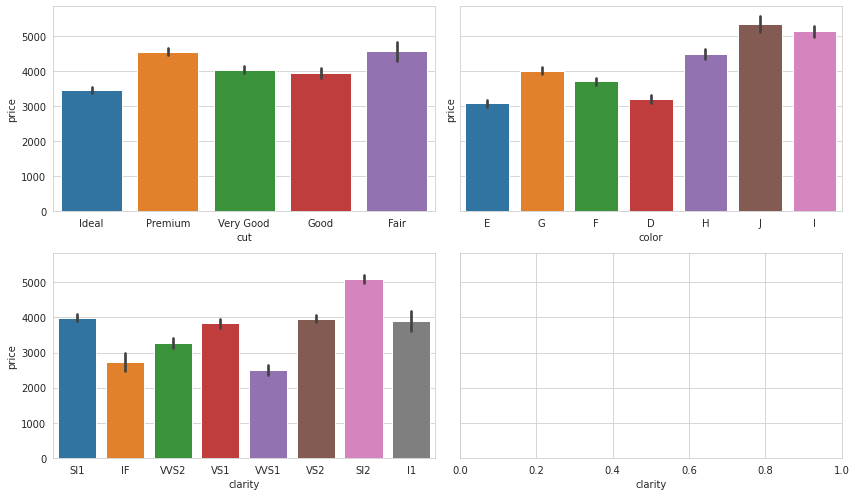

In [24]:
fig, axes = plt.subplots(2,2, figsize=(12,7), sharey=True)
row, col = 0, 0
for i in df.columns[:-1]:
    if df[i].dtype == 'object':
        if (row < 2) & (col < 2):
            sns.barplot(df[i], df['price'], ax=axes[row][col])
            col += 1
        else:       
            row += 1
            col = 0
            sns.barplot(df[i], df['price'], ax=axes[row][col])
            col += 1
        plt.xlabel("{}".format(i));
plt.tight_layout()    

In [25]:
df[['cut', 'price']].groupby('cut').mean()

,price
cut,
Fair,4568.096154
Good,3926.336756
Ideal,3454.820639
Premium,4544.558525
Very Good,4032.267961


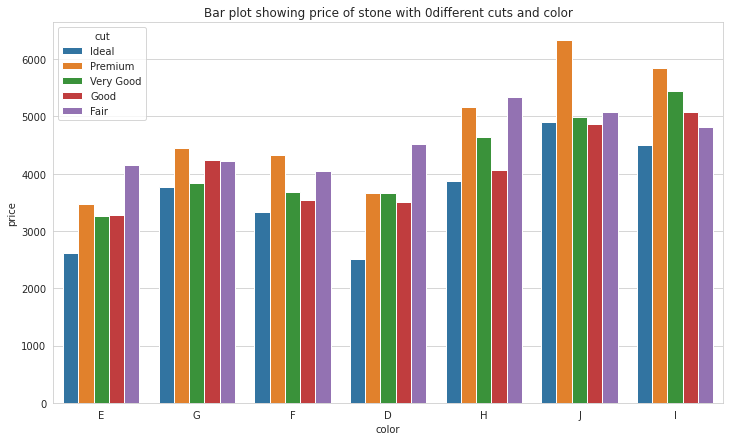

In [26]:
plt.figure(figsize=(12,7));
sns.barplot(df['color'], df['price'], hue=df['cut'], ci=False);
plt.title('Bar plot showing price of stone with 0different cuts and color');

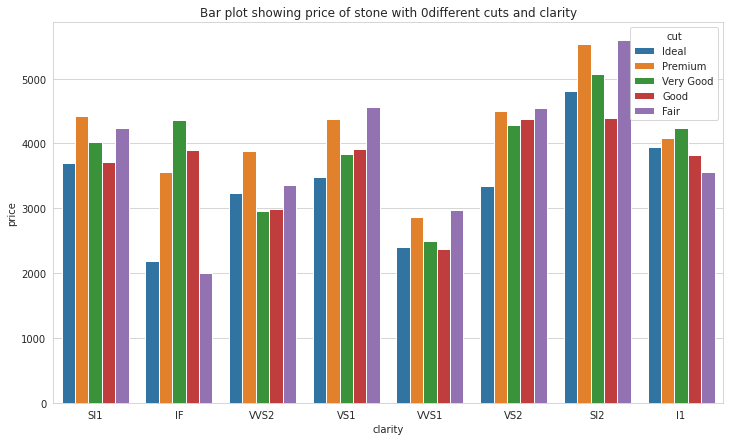

In [27]:
plt.figure(figsize=(12,7));
sns.barplot(df['clarity'], df['price'], hue=df['cut'], ci=False);
plt.title('Bar plot showing price of stone with 0different cuts and clarity');

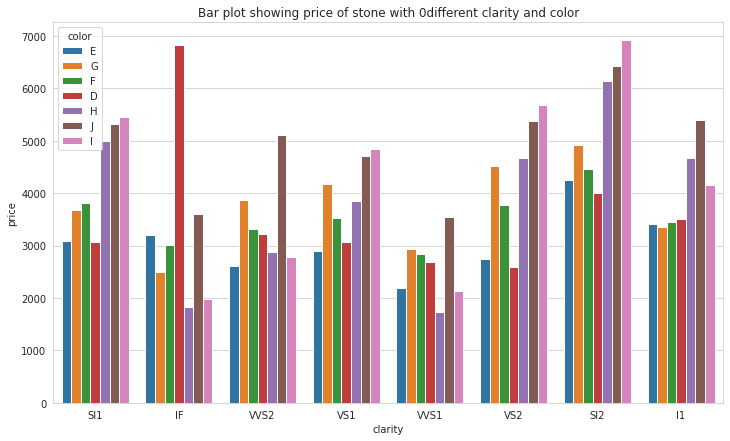

In [28]:
plt.figure(figsize=(12,7));
sns.barplot(df['clarity'], df['price'], hue=df['color'], ci=False);
plt.title('Bar plot showing price of stone with 0different clarity and color');

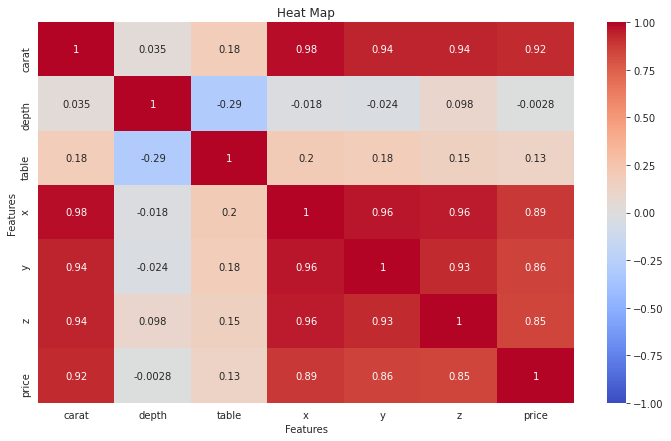

In [29]:
plt.figure(figsize=(12,7));
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True);
plt.title('Heat Map');
plt.xlabel('Features');
plt.ylabel('Features');

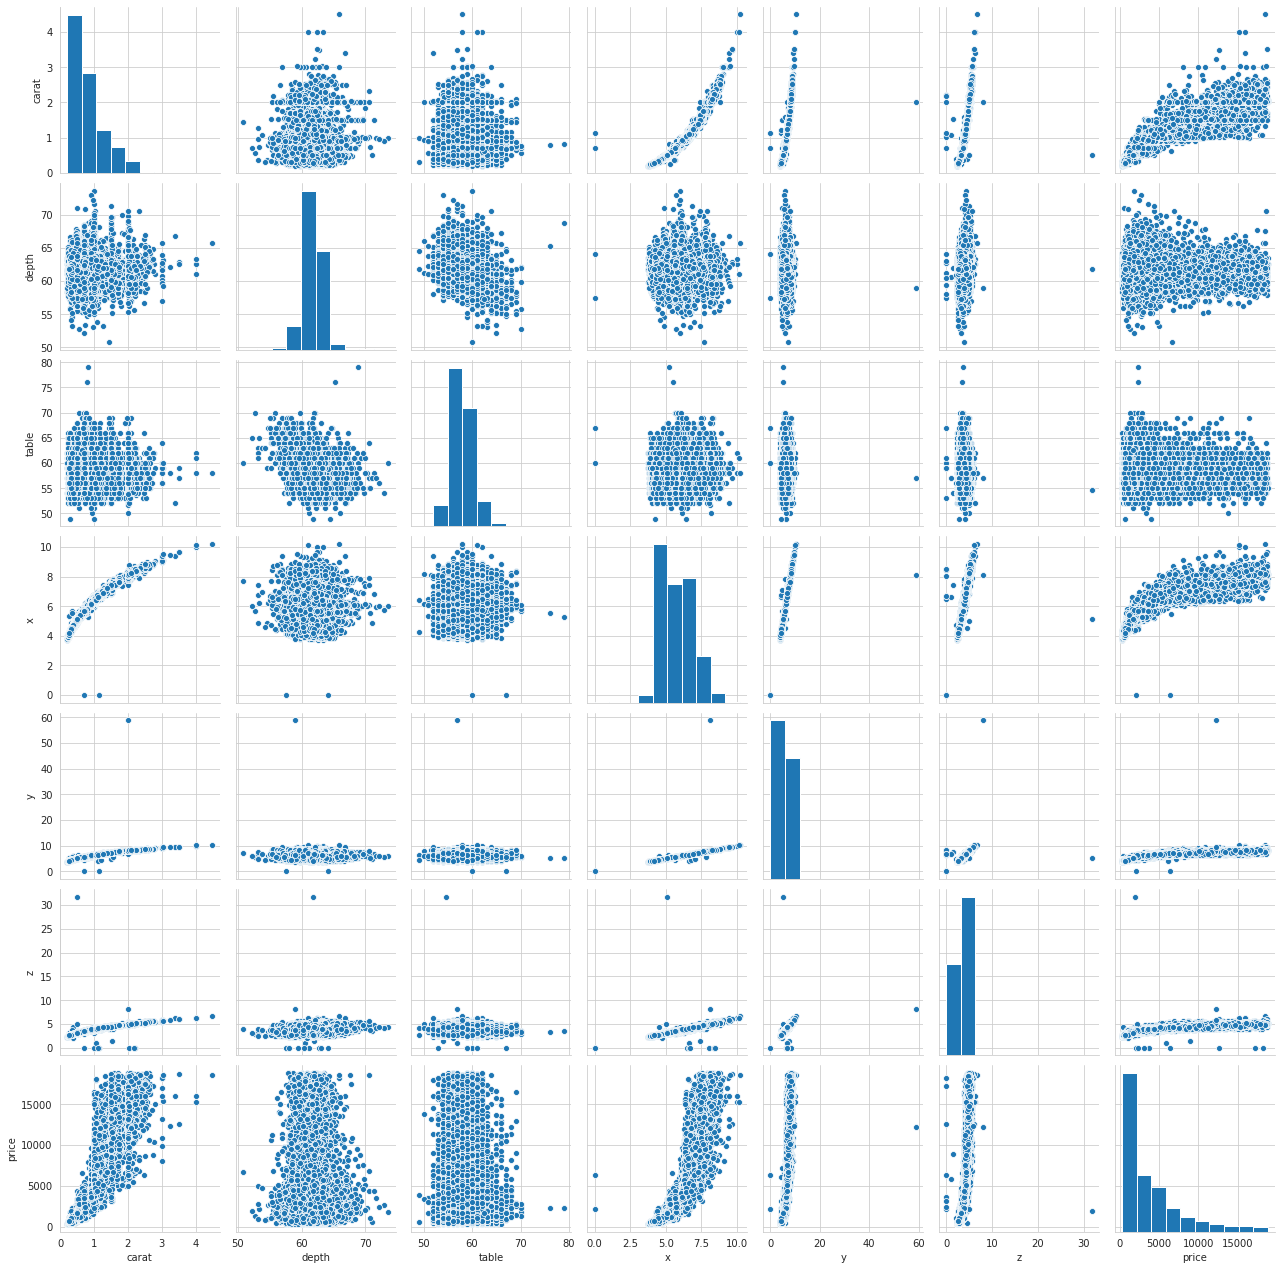

In [30]:
sns.pairplot(df);

In [31]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

In [32]:
X = df.drop(['cut', 'color', 'clarity', 'price'], axis=1)
calc_vif(X)

,variables,VIF
0,carat,73.718472
1,depth,497.143470
2,table,494.177847
3,x,1029.185521
4,y,347.225386
5,z,330.285034


##### clearly, we can see that independent variables shows highly correlation with them by performing variance_inflation_factor.
##### Either, we can perform PCA or dropping one of the features to remove multi-collinearity.

### Type conversion

In [33]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = pd.Categorical(df[i]).codes

In [34]:
df.dtypes

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Treating outliers

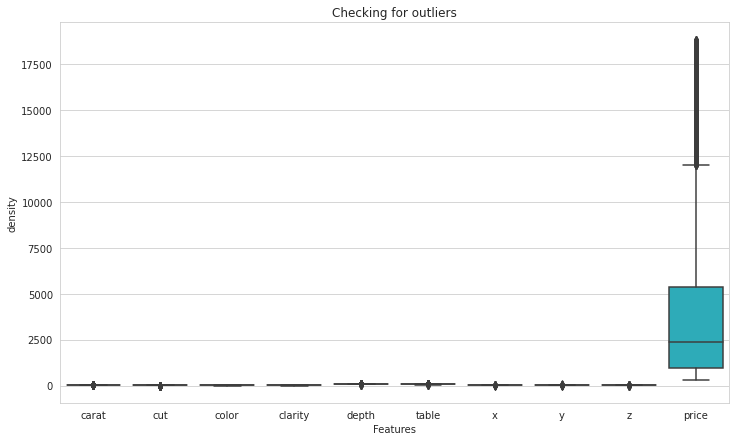

In [35]:
plt.figure(figsize=(12,7));
sns.boxplot(data=df);
plt.title('Checking for outliers');
plt.xlabel('Features');
plt.ylabel('density');

In [36]:
def remove_outliers(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    iqr = Q3 - Q1
    ll = Q1 - 1.5*iqr
    ul = Q3 + 1.5*iqr
    return ll, ul

In [37]:
for i in df.columns:
    if df[i].dtype != 'object': 
        ll, ul = remove_outliers(df[i])
        df[i] = np.where(df[i] < ll, ll, df[i])
        df[i] = np.where(df[i] > ul, ul, df[i])    

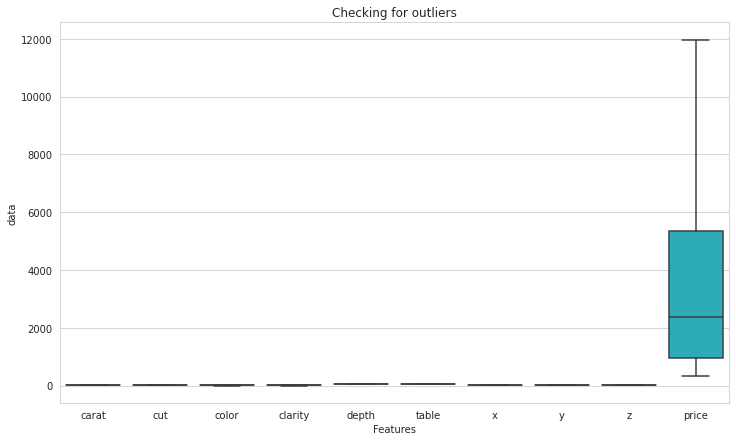

In [38]:
plt.figure(figsize=(12,7));
sns.boxplot(data=df);
plt.title('Checking for outliers');
plt.xlabel('Features');
plt.ylabel('data');

### Scaling

In [39]:
scalar = StandardScaler()

In [40]:
X = df.drop('price', axis=1)
y = df.price

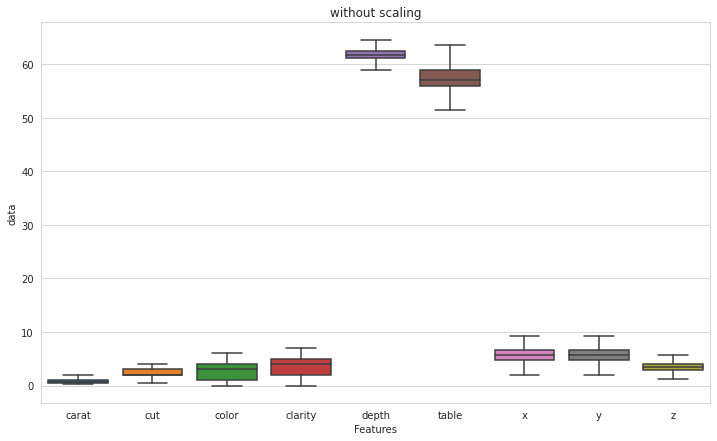

In [41]:
plt.figure(figsize=(12,7));
sns.boxplot(data=X);
plt.title('without scaling');
plt.xlabel('Features');
plt.ylabel('data');

In [42]:
X = scalar.fit_transform(X)
X = pd.DataFrame(data=X, columns=df.columns[:-1])

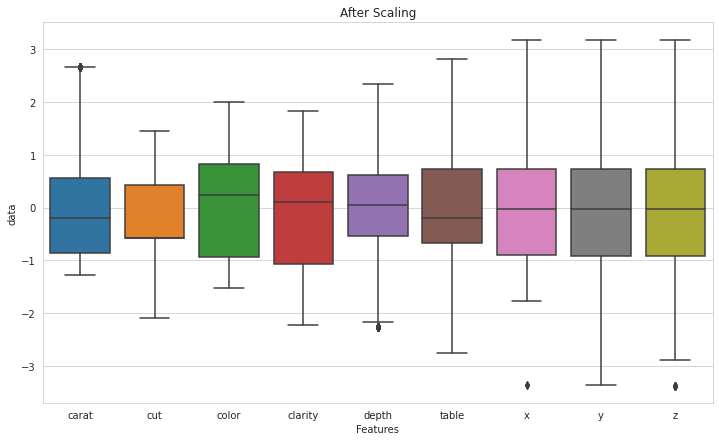

In [43]:
plt.figure(figsize=(12,7));
sns.boxplot(data=X);
plt.title('After Scaling');
plt.xlabel('Features');
plt.ylabel('data');

### End of EDA

### Splitting dataset in train and test sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Building Linear Regression model

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
train_pred = model.predict(X_train)

In [47]:
np.sqrt(mean_squared_error(y_train, train_pred))

1047.527284835

In [48]:
test_pred = model.predict(X_test)

In [49]:
model.score(X_train, y_train)

0.9086380896159194

In [50]:
model.score(X_test, y_test)

0.9117583574217042

In [51]:
np.sqrt(mean_squared_error(y_test, test_pred))

1031.9655214758936

#### Model performs good on training data and test data as well.
#### RMSE is 1053.11 which is very high.

### Performing PCA to remove multicolinearity then will build the Linear regression model

In [52]:
pca = PCA(n_components=5)

In [53]:
x = pca.fit_transform(X_train)
x_testset = pca.transform(X_test)

In [54]:
pca_ratio = pca.explained_variance_ratio_ * 100
np.cumsum(pca_ratio)

array([46.26735061, 62.04032429, 73.07971478, 82.80523076, 92.13615674])

In [55]:
lin_model = LinearRegression()
lin_model.fit(x, y_train)

LinearRegression()

In [56]:
pca_model_test = lin_model.predict(x_testset)

In [57]:
pca_model_train = lin_model.predict(x)

In [58]:
print('R-Squared value for Train data', round(lin_model.score(x, y_train), 3))

R-Squared value for Train data 0.877


In [59]:
print('R-Squared value for Test data', round(lin_model.score(x_testset, y_test), 3))

R-Squared value for Test data 0.881


In [60]:
print('RMSE value for train data ->', round(np.sqrt(mean_squared_error(y_train, pca_model_train)), 2))

RMSE value for train data -> 1216.26


In [61]:
print('RMSE value for test data ->',round(np.sqrt(mean_squared_error(y_test, pca_model_test)), 2))

RMSE value for test data -> 1199.59


In [62]:
### MAPE - Mean Absolute Percentage Erro
print('mean absolute percentage error for train ->', round(np.sqrt(mean_squared_error(y_train, pca_model_train)), 2)/round(y_train.mean(), 2))

mean absolute percentage error for train -> 0.32552176729098525


In [63]:
print('mean absolute percentage error for test ->', round(np.sqrt(mean_squared_error(y_test, pca_model_test)), 2)/round(y_test.mean(), 2))

mean absolute percentage error for test -> 0.3212046076483535


In [64]:
df_comp = pd.DataFrame(pca.components_,columns=list(X))
df_comp.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.481717,0.026162,0.172853,-0.138680,0.007319,0.120163,0.485284,0.485024,0.482610
1,0.031919,-0.497446,0.103860,-0.031193,0.625031,-0.585729,0.004259,0.003577,0.077426
2,-0.027917,-0.163019,-0.556118,-0.804887,0.035709,0.118431,-0.007921,-0.011926,-0.005483
3,0.084349,-0.546181,-0.577110,0.496036,-0.292368,0.038862,0.107768,0.107112,0.073398
4,-0.071754,-0.650591,0.558170,-0.214963,-0.301608,0.322985,-0.061711,-0.067232,-0.101020


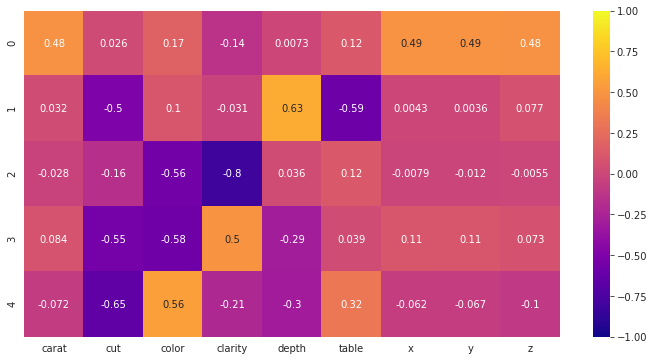

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma', annot=True, vmin=-1, vmax=1);

In [66]:
lin_model.intercept_

3736.3357290616877

In [67]:
lin_model.coef_

array([1527.88558966,   62.59716047, -281.10374725,  732.03108301,
       -619.88565177])

In [68]:
from statsmodels.formula.api import ols

In [69]:
lm = ols('price ~ carat+cut+color+clarity+depth+table+x+y+z', data=df).fit()

In [70]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 3.010e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:56:21   Log-Likelihood:            -2.2539e+05
No. Observations:               26933   AIC:                         4.508e+05
Df Residuals:                   26923   BIC:                         4.509e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9264.3429    609.714     15.195      0.0

In [71]:
lm.params

Intercept    9264.342907
carat        9143.072298
cut            40.480033
color        -228.530502
clarity       252.812549
depth         -86.469978
table         -72.444304
x           -1963.569873
y            1530.063022
z            -361.474952
dtype: float64

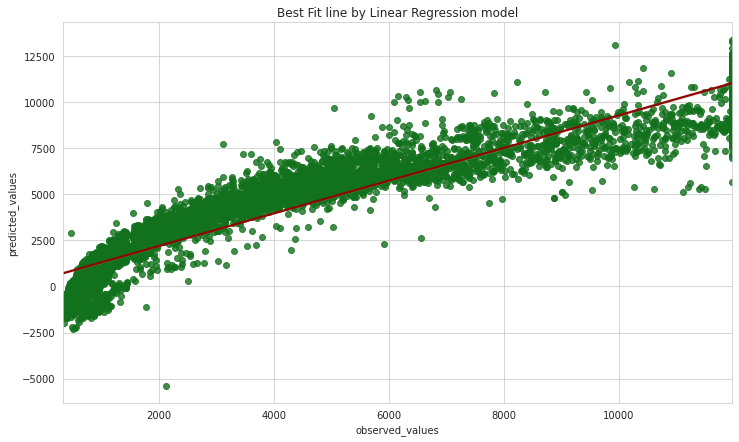

In [72]:
plt.figure(figsize=(12,7));
# plt.scatter(y_test, pca_model_test);
sns.regplot(y_test, pca_model_test, scatter_kws={'color':'g'}, line_kws={'color': 'r'});
plt.title('Best Fit line by Linear Regression model');
plt.xlabel('observed_values');
plt.ylabel('predicted_values');
plt.show()

In [73]:
residuals = y_test.values - pca_model_test
print(np.mean(residuals))

2.992183202828039


In [74]:
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')


 Breusch-Pagan test ----
                                     value
Lagrange multiplier statistic  2748.386677
p-value                           0.000000
f-value                         339.953587
f p-value                         0.000000

 Goldfeld-Quandt test ----
                value
F statistic  0.984859
p-value      0.811891

 Residuals plots ----


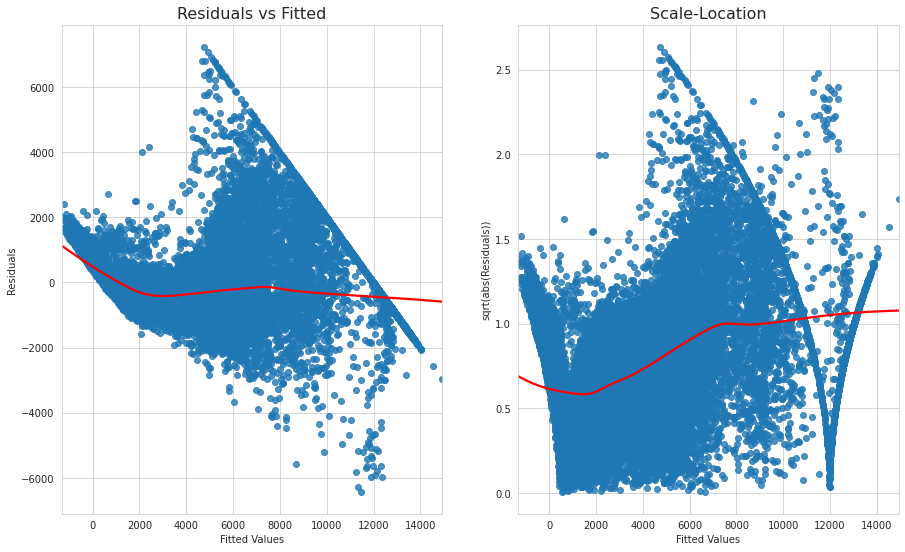

In [75]:
homoscedasticity_test(lm)

## End of Project